In [235]:
# set seed 
import numpy as np
np.random.seed(42)

# Credit Risk Modeling 

## Credit Risk Modelling
### 1. Indepdent Defualt Models 
1. Binomial Models
2. Poission Models

### 2. Mixture Models
1. Beta Binomial 
2. logit Binomial
3. Probit Binomial 
4. Poission Gamma 
5. Possion Lognormal 
6. Poission Weibull 
7. CreditRisk+

### 3. Threshold  Models
1. Gaussian
2. ASRF 
3. t-Distribution
4. Variance-Gamma
5. Generalized Hyperbolic


### Table of Contents
1. Introduction
2. Portfolio Parameters
3. Binomial Model
4. Beta-binomial Model
5. Logit-normal Mixture Model
6. Probit-normal Mixture Model
7. Risk Measures Calculation
8. Comparison of Results
9. Calibration of Logit-normal and Probit-normal Models
10. Recalculated Results After Calibration
11. Plots of Loss Distributions
12. Discussion and Conclusions
13. References

##  References
1. Credit Risk Modeling David J. Boulder 
2. Credit Risk Modeling by Professor Steven Zhu (Fordham University)





#### 1. Indepdent Defualt Models 
    a. Binomial Models
    b. Poission Models

#### 2. Mixture Models
    a. Beta Binomial 
    b. logit Binomial
    c. Probit Binomial 
    d. Poission Gamma 

## The Beta Binomial Mixture Model 
 
There is an inherent limitation of the independent models that they assume credit default event as independent of each other. Credit counterparties operate in a common economic environment, thus there is some degree of correlation between the default of one's credit counterparties. 

### Motivation behind the Beta Binomial Mixture Model
With the sufficient large portfolio N, we can diversify away all the idiosyncratic risks. Using positive default correlation a systematic element is introduced which follows the idea of CAPM Model. 

The general idea behind the class of mixture models is to randomize the default probability. Practically, this involves making the default probability dependent on random variable Z. That is conditional default probability is defined for each issurs denoted  by 
$$
    P(D_i = 1 | Z) = P(z) \in (0,1)
$$    
where:
Z - unspecified random variable

        Notes: Since P is now a function of Z it follows thaat p(z) is also a random variable. Therefore p(z) has its down CDF Fp(z)(Z) and PDF Fp(z)(Z). 

The Geneal Form:

$$
    E(p(Z)) = \bar{p} = \int_{-\infty}^{\infty} p(z) f_Z(z) \, dz
$$

            Assuming Z has an infinite support 

What changes now, in this adjusted setting, is that our default indicators, $ \text{I}_{D1}, \ldots, \text{I}_{Dn} $ remain identically distributed but are no longer independent. The key point is that, given \(Z\), the default events are independent. By construction, we have: 

$$ \mathbb{E}[\text{ID}_n \mid Z = 1] = 1 \cdot P(\text{I}_{Dn} = 1) \cdot \frac{1}{p(Z)} + 0 \cdot P(\text{I}_{Dn} = 0) \cdot \frac{1}{1 - p(Z)} = p(Z) $$

### Unconditional Probability of Default is gven by :

$$
\mathbb{E}[\text{I}_{dn}] = \mathbb{E}\left(\mathbb{E}[\text{I}_{dn} \mid Z]\right) \tag{3.4}
$$
            (using Iterated Expectations)
$$
= \mathbb{E}(p(Z)) = \bar{p}
$$


This is a sensible outcome as, one integrates out the random variable Z. The most reasonable guess fpr the unconditional default probability is the avg accross all values of the Z variable

### Uncoditional Variance is gven by :

$$
\text{Var}(\text{I}_{d_n}) = \mathbb{E}\left(\text{I}_{d_n}^2\right) - \left(\mathbb{E}[\text{I}_{d_n}]\right)^2
$$

$$
= \mathbb{E}\left(\text{I}_{d_n}^2\right) - \bar{p}^2
$$

$$
= \frac{\mathbb{E}[\text{I}_{d_n}^2]}{P(\text{I}_{d_n} = 1)} - \bar{p}^2
$$

$$
= \frac{P(\text{I}_{d_n} = 1)}{\bar{p}} - \bar{p}^2
$$

$$
= \bar{p}(1 - \bar{p})
$$

This is analogus to independent default setting but the average default probability replacing the model parameters. The burnoilli trial structure is still present and in unconditional. 

### Conditional Varaince is given:


        Condtional default varaince is not constant 
        like expectation it is random


$$
\text{Var}(\text{I}_{d_n} \mid Z) = \mathbb{E}\left(\text{I}_{d_n}^2 - \left(\mathbb{E}[\text{I}_{d_n} \mid Z]\right)^2 \mid Z\right)
$$

$$
= \mathbb{E}\left(\text{I}_{d_n}^2 \mid Z\right) - p(Z)^2
$$

$$
= 1^2 \cdot P(\text{I}_{d_n} = 1 \mid Z) + 0^2 \cdot P(\text{I}_{d_n} = 0 \mid Z) - p(Z)^2
$$

$$
= \frac{P(\text{I}_{d_n} = 1 \mid Z)}{p(Z)} + \frac{P(\text{I}_{d_n} = 0 \mid Z)}{1 - p(Z)} - p(Z)^2
$$

$$
= p(Z)(1 - p(Z))
$$

     Conditional Variance can take range of possible values each depending on the outcome of the Z

### Default Correlation Coefficient

        In binomial & possion model it is 0 (independent)

We can compute the correlation betwween the default indicators of n and m credit counterparties

$$
\text{Cov}(\text{I}_{d_n}, \text{I}_{d_m}) = \mathbb{E}\left[\left(\text{I}_{d_n} - \mathbb{E}[\text{I}_{d_n}]\right)\left(\text{I}_{d_m} - \mathbb{E}[\text{I}_{d_m}]\right)\right]
$$

$$
= \mathbb{E}\left[\text{I}_{d_n}\text{I}_{d_m} - \bar{p}\text{I}_{d_n} - \bar{p}\text{I}_{d_m} + \bar{p}^2\right]
$$

$$
= \mathbb{E}[\text{I}_{d_n}\text{I}_{d_m}] - \bar{p} \cdot \mathbb{E}[\text{I}_{d_n}] - \bar{p} \cdot \mathbb{E}[\text{I}_{d_m}] + \bar{p}^2
$$

$$
= \mathbb{E}[\text{I}_{d_n}\text{I}_{d_m}] - \bar{p}^2
$$

$$
= \mathbb{E}\left(\mathbb{E}[\text{I}_{d_n}\text{I}_{d_m} \mid Z]\right) - \bar{p}^2 \quad \text{(Iterated Expectations)}
$$

$$
= \mathbb{E}\left(\mathbb{E}[\text{I}_{d_n} \mid Z] \cdot \mathbb{E}[\text{I}_{d_m} \mid Z]\right) - \bar{p}^2 \quad \text{(By conditional independence)}
$$

$$
= \mathbb{E}\left(p(Z)^2\right) - \bar{p}^2
$$

$$
= \mathbb{E}\left(p(Z)^2\right) - \mathbb{E}\left(p(Z)\right)^2
$$

$$
= \text{Var}(p(Z))
$$

1. The covariance between any two credit counterparties simplifies to the variance of the random default probability.
2. Each counterparty's dependence on the common factor Z results in equivalence between covariance and variance.

3. The exact form of this variance depends on:
- The chosen distribution for the common factor Z.
- The structure of the probability parameter p.

### Expected Value of Total Defaults:
$$
\mathbb{E}(\text{D}_N) = \mathbb{E}\left(\sum_{n=1}^{N} \text{I}_{d_n}\right)
$$

$$
= \sum_{n=1}^{N} \mathbb{E}(\text{I}_{d_n}) = \sum_{n=1}^{N} \bar{p}
$$

$$
= N \bar{p}
$$

### Variance of dependant setting is:

$$
\text{Var}(\text{D}_N) = \text{Var}\left(\sum_{n=1}^{N} \text{I}_{d_n}\right)
$$

$$
= \sum_{n=1}^{N} \sum_{m=1}^{N} \text{Cov}(\text{I}_{d_n}, \text{I}_{d_m})
$$

$$
= \sum_{n=1}^{N} \text{Var}(\text{I}_{d_n}) + \sum_{n=1}^{N} \sum_{\substack{m=1 \\ m \neq n}}^{N} \text{Cov}(\text{I}_{d_n}, \text{I}_{d_m})
$$

$$
= N \bar{p}(1 - \bar{p}) + N(N - 1) \text{Var}(p(Z))
$$

### Convergance Properties
$$
\mathbb{P}\left(\left|\frac{\text{D}_N}{N} - p(Z)\right| \geq \varepsilon \mid Z\right) \leq \frac{p(Z)(1 - p(Z))}{N \varepsilon^2}
$$
1. Chebyshev’s inequality helps to establish an upper bound on the probability that a random variable deviates significantly from its expected value. We applied **Chebyshev’s inequality** to analyze the convergence of the proportion of defaults. We applied Chebyshev’s inequality to analyze the convergence of the proportion of defaults, $\frac{\text{D}_N}{N}$, as $N \to \infty$.

2. Markov’s inequality gives an upper bound on the probability that a non-negative random variable exceeds a certain value, using its expected value. Markov’s inequality is applied in the context of convergence to show that the conditional expected proportion of defaults, given $Z$, converges almost surely to $p(Z)$. The inequality is used to demonstrate the behavior of $\frac{\text{D}_N}{N}$ as $N$ grows, particularly when conditioned on the common risk factor $Z$.

3. The Borel-Cantelli theorem is used to determine almost-sure convergence. It states that if the sum of probabilities of a sequence of events is finite, then the probability that infinitely many of those events occur is zero. The theorem is applied to show that the sequence $\frac{\text{D}_N}{N}$ converges almost surely to $p(Z)$ as $N \to \infty$, given the state variable $Z$. By applying the theorem, we ensure that for large portfolios, the proportion of defaults converges to the true underlying default probability $p(Z)$ with probability 1.

### Beta Distribution Assumption 
We assume that the state variable, $Z$, follows a beta distribution with parameters $\alpha$ and $\beta$. More formally,

$$
Z \sim \text{Beta}(\alpha, \beta).
$$

### Mean is given as:

$$
\mathbb{E}(Z) = \frac{\alpha}{\alpha + \beta}, \tag{3.21}
$$

### Variance is given as:

$$
\text{Var}(Z) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}. \tag{3.22}
$$

### The probability mass function simplifies to:

$$
P(\text{D}_N = k) = \binom{N}{k} \frac{B(\alpha + k, \beta + N - k)}{B(\alpha, \beta)},
$$

                where $B(\alpha, \beta)$ is the beta function, which normalizes the beta distribution.

                The cumulative distribution function (CDF) for the total number of defaults is:

$$
P(\text{D}_N \le m) = \sum_{k=0}^{m} P(\text{D}_N = k).
$$

                This sums the probability mass function values up to $m$.


The use of the beta distribution as a prior for the probability of default 𝑝(𝑍) provides a flexible, bounded model that is ideal for modeling proportions. The beta-binomial mixture model is derived to account for both individual variability and the overall risk level in the portfolio.
The choice of p(Z) as the identity function makes the problem tractable, leading to a closed-form solution for the PMF and CDF of the total number of defaults This model is particularly useful for large portfolios where the underlying default probability might vary due to a common risk factor.












In [236]:
from scipy.special import comb, beta as beta_func
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
from scipy.integrate import quad
import pandas as pd

In [237]:
# Utility functions for calculations
def computeBeta(a, b):
    return beta_func(a, b)

def getBC(n, k):
    return comb(n, k)


def analyticExpectedShortfall(N, alphas, pmf, c):
    cdf = np.cumsum(pmf)
    expectedShortfall = []
    for alpha in alphas:
        tail_cdf = cdf[cdf >= alpha]
        tail_losses = np.linspace(0, N, N + 1)[len(cdf) - len(tail_cdf):]
        tail_probs = pmf[len(cdf) - len(tail_cdf):]
        es = np.dot(tail_losses * c, tail_probs) / np.sum(tail_probs)
        expectedShortfall.append(es)
    return np.array(expectedShortfall)

In [238]:
# Independent Binomial Loss Distribution
def independentBinomialLossDistribution(N, M, p, c, alphas):
    U = np.random.uniform(0, 1, (M, N))
    defaultIndicator = (U < p).astype(int)
    losses = np.sum(defaultIndicator, axis=1) * c
    var = [np.percentile(losses, alpha*100) for alpha in alphas]
    es = [np.mean(losses[losses >= v]) for v in var]
    return var, es, np.mean(losses), np.std(losses)

In [239]:
# Beta-Binomial Analytic Calculation
def betaBinomialAnalytic(N, c, a, b, alphas):
    pmfBeta = np.zeros(N + 1)
    den = computeBeta(a, b)
    for k in range(N + 1):
        pmfBeta[k] = getBC(N, k) * computeBeta(a + k, b + N - k) / den
    
    # Normalize PMF to ensure it sums to 1
    pmfBeta /= np.sum(pmfBeta)
    
    # Calculate CDF
    cdfBeta = np.cumsum(pmfBeta)
    
    # Debug prints for PMF and CDF
    print("PMF (Beta-Binomial):", pmfBeta)
    print("CDF (Beta-Binomial):", cdfBeta)
    
    # Calculate VaR using the normalized CDF
    varAnalytic = np.array([c * np.interp(alpha, cdfBeta, np.linspace(0, N, N + 1)) for alpha in alphas])
    
    # Debug prints for VaR calculation
    print("VaR (Beta-Binomial) Calculation - CDF Interpolation Results:", varAnalytic)
    
    esAnalytic = analyticExpectedShortfall(N, alphas, pmfBeta, c)
    expected_loss = np.sum(np.arange(N + 1) * pmfBeta) * c
    volatility_loss = np.sqrt(np.sum(((np.arange(N + 1) * c) ** 2) * pmfBeta) - expected_loss ** 2)
    return pmfBeta, cdfBeta, varAnalytic, esAnalytic, expected_loss, volatility_loss

## Logit and Probit Normal Mixture Models - Monte Carlo Simulation

For the Logit and Probit models, we will use a systematic risk factor 𝑍 and a logistic or normal distribution to determine the conditional default probability.

These models fall under the category of mixture models, where a latent factor (e.g., economic conditions) influences default probabilities across multiple obligors.

. Logit-Normal and Probit-Normal Mixture Models
The logit-normal and probit-normal mixture models are both used to model default probabilities of obligors. They extend basic default probability models by including a systematic factor, often denoted as Z, which follows a normal distribution. The key difference lies in the functional form that transforms the systematic factor to a default probability, p(Z).

Logit Model
The logit model uses a logistic transformation to determine the conditional default probability. The equation is:

The formula for \( p_1(Z) \) is as follows:

$$
p_1(Z) = \frac{1}{1 + e^{-(\mu_1 + \sigma_1 Z)}}
$$

where:
Z is the systematic risk factor and follows a standard normal distribution, N(0,1).
μ₁ is the mean and σ₁ is the standard deviation that determines the steepness of the logistic curve.

This function has an S-shaped form and is confined between 0 and 1, which is appropriate for representing probabilities. It exhibits a smooth transition across different values of Z, which makes it useful for modeling how the probability of default changes due to the systematic factor .

Probit Model
The probit model uses the cumulative distribution function (CDF) of a normal distribution to determine the conditional default probability. The equation is:

$$
p_2(Z) = \Phi(\mu_2 + \sigma_2 Z)
$$

​(z)dz
Here, f_Z(z) is the density of the normal distribution for Z. This integral is generally computed using numerical integration techniques or alternatively using MonteCarlo Simulation.

Fat Tails and Leptokurtosis: One of the key motivations for using logit and probit mixture models is to generate leptokurtotic distributions, which have fat tails compared to the basic binomial model. These fat tails account for extreme default events that are observed in financial crises.


In [243]:
# Logit and Probit Normal Mixture Models - Monte Carlo Simulation
def logit_density(z, mu, sigma):
    return 1 / (1 + np.exp(-(mu + sigma * z)))

def probit_density(z, mu, sigma):
    return norm.cdf(mu + sigma * z)

In [244]:
def logitProbitMixture(z, N, k, mu, sigma, isLogit):
    if isLogit:
        p = logit_density(z, mu, sigma)
    else:
        p = probit_density(z, mu, sigma)
    return binom.pmf(k, N, p) * p * (1 - p)

In [245]:
def logitProbitBinomialAnalytic(N, c, mu, sigma, alphas, isLogit):
    pmf = np.zeros(N + 1)
    for k in range(N + 1):
        pmf[k], _ = quad(logitProbitMixture, -5, 5, args=(N, k, mu, sigma, isLogit))

    cdf = np.cumsum(pmf)
    cdf /= cdf[-1]  # Normalize CDF
    varAnalytic = np.interp(alphas, cdf, np.linspace(0, c * N, N + 1))
    esAnalytic = []
    for alpha in alphas:
        idx = np.searchsorted(cdf, alpha)
        if idx < N:
            esAnalytic.append(np.sum(pmf[idx:] * np.linspace(idx * c, N * c, N + 1 - idx)) / np.sum(pmf[idx:]))
        else:
            esAnalytic.append(varAnalytic[-1])

    expected_loss = np.sum(np.arange(N + 1) * pmf) * c
    volatility_loss = np.sqrt(np.sum(((np.arange(N + 1) * c) ** 2) * pmf) - expected_loss ** 2)

    return pmf, cdf, varAnalytic, esAnalytic, expected_loss, volatility_loss

In [246]:
def logit_probit_binomial_simulation(N, M, c, mu, sigma, alphas, isLogit):
    Z = np.random.normal(0, 1, M)
    if isLogit:
        p = 1 / (1 + np.exp(-(mu + sigma * Z)))
    else:
        p = norm.cdf(mu + sigma * Z)
    losses = np.random.binomial(N, p) * c
    vaR = {}
    eS = {}
    sorted_losses = np.sort(losses)
    for alpha in alphas:
        vaR[alpha] = np.percentile(sorted_losses, alpha * 100)
        cutoff_index = int(np.ceil(alpha * M)) - 1
        eS[alpha] = np.mean(sorted_losses[cutoff_index:]) if cutoff_index < M else sorted_losses[-1]

    expected_loss = np.mean(losses)
    volatility_loss = np.std(losses)

    return vaR, eS, expected_loss, volatility_loss


In [247]:
# Parameters
N = 100
EAD = 10e6
LGD = 1.0
p = 0.01
a = 0.2
b = 18.8
c = EAD * LGD
M = 100000
alphas = [0.95, 0.97, 0.99, 0.995, 0.999, 0.9997, 0.9999]

In [248]:
# Beta-Binomial model
pmfBeta, cdfBeta, varBeta, esBeta, expected_loss_beta, volatility_loss_beta = betaBinomialAnalytic(N, c, a, b, alphas)

# Independent Binomial model
varBin, esBin, expected_loss_bin, volatility_loss_bin = independentBinomialLossDistribution(N, M, p, c, alphas)

# Logit Model Simulation
isLogit = True
vaR_logit_sim, eS_logit_sim, expected_loss_logit_sim, volatility_loss_logit_sim = logit_probit_binomial_simulation(N, M, c, mu=-2, sigma=4.0, alphas=alphas, isLogit=isLogit)

# Probit Model Simulation
isLogit = False
vaR_probit_sim, eS_probit_sim, expected_loss_probit_sim, volatility_loss_probit_sim = logit_probit_binomial_simulation(N, M, c, mu=-2, sigma=4.0, alphas=alphas, isLogit=isLogit)

# Logit Model Analytic
isLogit = True
_, _, var_logit_analytic, es_logit_analytic, expected_loss_logit_analytic, volatility_loss_logit_analytic = logitProbitBinomialAnalytic(N, c, mu=-2, sigma=4.0, alphas=alphas, isLogit=isLogit)

# Probit Model Analytic
isLogit = False
_, _, var_probit_analytic, es_probit_analytic, expected_loss_probit_analytic, volatility_loss_probit_analytic = logitProbitBinomialAnalytic(N, c, mu=-2, sigma=4.0, alphas=alphas, isLogit=isLogit)

PMF (Beta-Binomial): [6.89133295e-01 1.17000559e-01 5.95019969e-02 3.69275490e-02
 2.49614791e-02 1.76879936e-02 1.29105627e-02 9.61445944e-03
 7.26290844e-03 5.54456398e-03 4.26646045e-03 3.30292688e-03
 2.56894313e-03 2.00524745e-03 1.56953801e-03 1.23103392e-03
 9.66984332e-04 7.60356107e-04 5.98260791e-04 4.70859827e-04
 3.70587653e-04 2.91591025e-04 2.29318487e-04 1.80215981e-04
 1.41498694e-04 1.10978421e-04 8.69318699e-05 6.79994793e-05
 5.31072082e-05 4.14057582e-05 3.22231298e-05 2.50274438e-05
 1.93977106e-05 1.50007866e-05 1.15731651e-05 8.90656267e-06
 6.83649201e-06 5.23319391e-06 3.99443501e-06 3.03978532e-06
 2.30607064e-06 1.74375898e-06 1.31409019e-06 9.86797310e-07
 7.38299008e-07 5.50267301e-07 4.08493941e-07 3.01994513e-07
 2.22301517e-07 1.62907585e-07 1.18827823e-07 8.62565319e-08
 6.22985914e-08 4.47598069e-08 3.19837166e-08 2.27249365e-08
 1.60511665e-08 1.12676218e-08 7.85896171e-09 5.44482909e-09
 3.74594364e-09 2.55835053e-09 1.73394793e-09 1.16583016e-09
 7.

In [249]:
# Output results
print("Risk Measures:\n")
print("Quantile (Alpha):", alphas)
print("VaR (Independent Binomial):", varBin)
print("ES (Independent Binomial):", esBin)
print("VaR (Beta-Binomial):", varBeta)
print("ES (Beta-Binomial):", esBeta)

# Logit/Probit Analytic Table
logit_probit_analytic_data = {
    'Quantile (Alpha)': alphas,
    'VaR (Logit Analytic)': var_logit_analytic,
    'ES (Logit Analytic)': es_logit_analytic,
    'VaR (Probit Analytic)': var_probit_analytic,
    'ES (Probit Analytic)': es_probit_analytic
}
logit_probit_analytic_df = pd.DataFrame(logit_probit_analytic_data)
print("\nLogit and Probit Analytic Model Results:")
print(logit_probit_analytic_df)

Risk Measures:

Quantile (Alpha): [0.95, 0.97, 0.99, 0.995, 0.999, 0.9997, 0.9999]
VaR (Independent Binomial): [30000000.0, 30000000.0, 40000000.0, 40000000.0, 50000000.0, 60000000.0, 60000000.0]
ES (Independent Binomial): [32761380.69034517, 32761380.69034517, 42105263.15789474, 42105263.15789474, 51601208.4592145, 62045454.54545455, 62045454.54545455]
VaR (Beta-Binomial): [5.37079148e+07 7.31145986e+07 1.17338600e+08 1.46023523e+08
 2.12260720e+08 2.60426331e+08 3.03261800e+08]
ES (Beta-Binomial): [9.44671725e+07 1.15551638e+08 1.56322198e+08 1.86229019e+08
 2.54887825e+08 3.03386650e+08 3.41991995e+08]

Logit and Probit Analytic Model Results:
   Quantile (Alpha)  VaR (Logit Analytic)  ES (Logit Analytic)  \
0            0.9500          9.495000e+08         9.750000e+08   
1            0.9700          9.697000e+08         9.850000e+08   
2            0.9900          9.899000e+08         9.950000e+08   
3            0.9950          9.949500e+08         9.998990e+08   
4            0.

In [250]:
# Logit/Probit Simulation Table
logit_probit_sim_data = {
    'Quantile (Alpha)': alphas,
    'VaR (Logit Simulation)': list(vaR_logit_sim.values()),
    'ES (Logit Simulation)': list(eS_logit_sim.values()),
    'VaR (Probit Simulation)': list(vaR_probit_sim.values()),
    'ES (Probit Simulation)': list(eS_probit_sim.values())
}
logit_probit_sim_df = pd.DataFrame(logit_probit_sim_data)
print("\nLogit and Probit Simulation Model Results:")
print(logit_probit_sim_df)

# Expected Loss and Volatility of Loss
print("\nExpected Loss and Volatility of Loss:")
print(f"Independent Binomial - Expected Loss: ${expected_loss_bin:,.2f}, Volatility of Loss: ${volatility_loss_bin:,.2f}")
print(f"Beta-Binomial - Expected Loss: ${expected_loss_beta:,.2f}, Volatility of Loss: ${volatility_loss_beta:,.2f}")
print(f"Logit Model Analytic - Expected Loss: ${expected_loss_logit_analytic:,.2f}, Volatility of Loss: ${volatility_loss_logit_analytic:,.2f}")
print(f"Probit Model Analytic - Expected Loss: ${expected_loss_probit_analytic:,.2f}, Volatility of Loss: ${volatility_loss_probit_analytic:,.2f}")
print(f"Logit Model Simulation - Expected Loss: ${expected_loss_logit_sim:,.2f}, Volatility of Loss: ${volatility_loss_logit_sim:,.2f}")
print(f"Probit Model Simulation - Expected Loss: ${expected_loss_probit_sim:,.2f}, Volatility of Loss: ${volatility_loss_probit_sim:,.2f}")



Logit and Probit Simulation Model Results:
   Quantile (Alpha)  VaR (Logit Simulation)  ES (Logit Simulation)  \
0            0.9500            9.900000e+08           9.985163e+08   
1            0.9700            1.000000e+09           1.000000e+09   
2            0.9900            1.000000e+09           1.000000e+09   
3            0.9950            1.000000e+09           1.000000e+09   
4            0.9990            1.000000e+09           1.000000e+09   
5            0.9997            1.000000e+09           1.000000e+09   
6            0.9999            1.000000e+09           1.000000e+09   

   VaR (Probit Simulation)  ES (Probit Simulation)  
0             1.000000e+09            1.000000e+09  
1             1.000000e+09            1.000000e+09  
2             1.000000e+09            1.000000e+09  
3             1.000000e+09            1.000000e+09  
4             1.000000e+09            1.000000e+09  
5             1.000000e+09            1.000000e+09  
6             1.000000e+

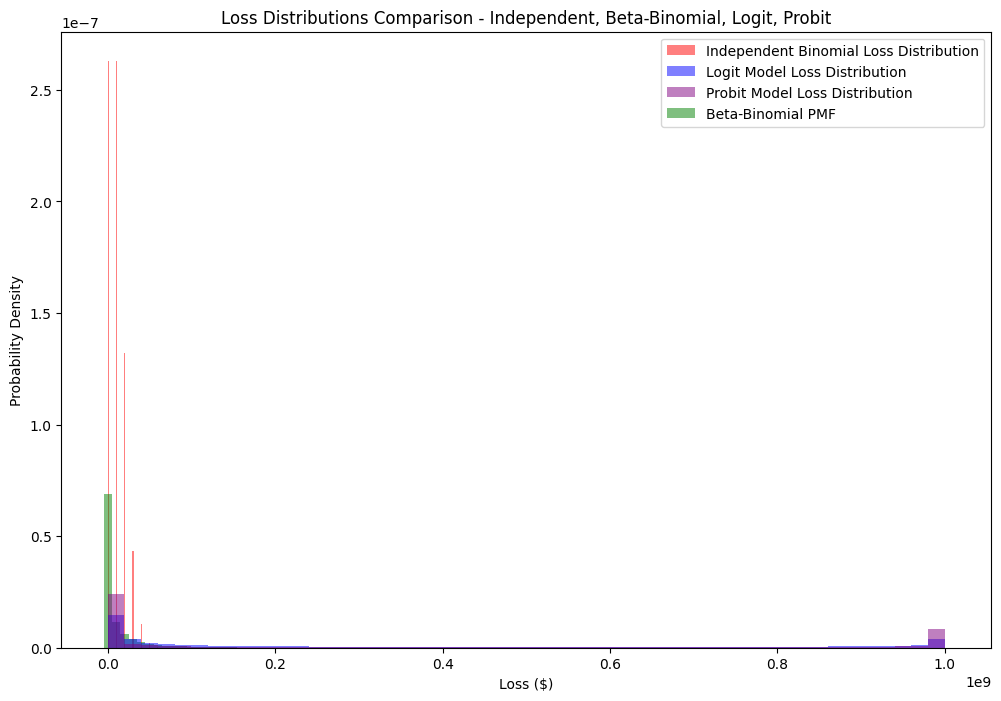

In [251]:
# Plotting
plt.figure(figsize=(12, 8))
plt.hist(np.random.binomial(N, p, size=100000) * c, bins=50, alpha=0.5, label='Independent Binomial Loss Distribution', density=True, color='red')
plt.bar(np.arange(N + 1) * c, pmfBeta / c, width=c, alpha=0.5, label='Beta-Binomial PMF', color='green')
losses_logit = np.random.binomial(N, 1 / (1 + np.exp(-(-2 + 4.0 * np.random.normal(0, 1, M))))).astype(int) * c
plt.hist(losses_logit, bins=50, alpha=0.5, label='Logit Model Loss Distribution', density=True, color='blue')
losses_probit = np.random.binomial(N, norm.cdf(-2 + 4.0 * np.random.normal(0, 1, M))).astype(int) * c
plt.hist(losses_probit, bins=50, alpha=0.5, label='Probit Model Loss Distribution', density=True, color='purple')
plt.title('Loss Distributions Comparison - Independent, Beta-Binomial, Logit, Probit')
plt.xlabel('Loss ($)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()



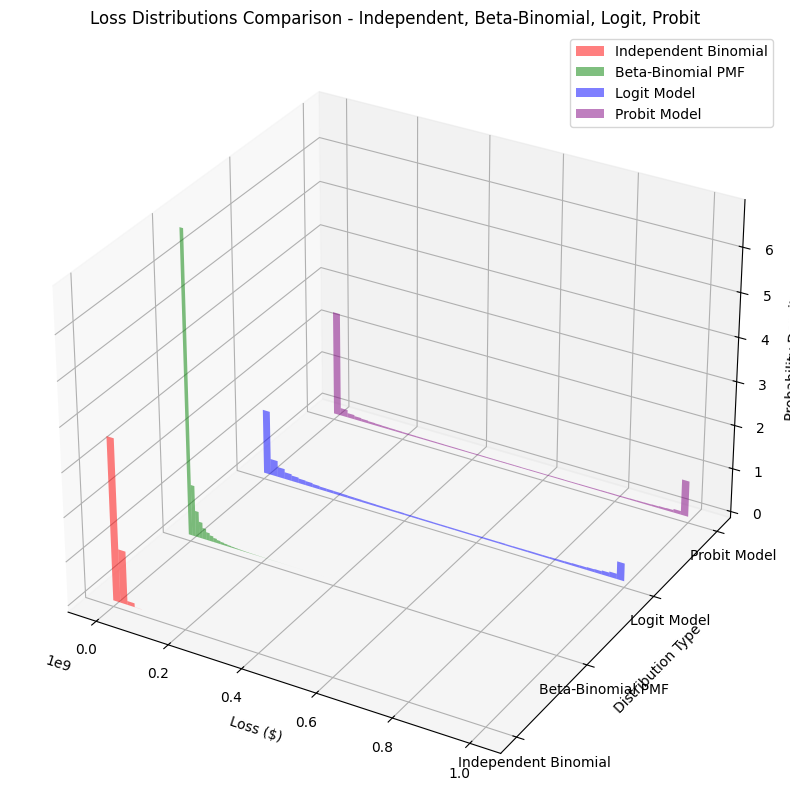

In [252]:
# 3D Plotting
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
bins = 50
hist_kwargs = {'bins': bins, 'density': True, 'alpha': 0.5}
bin_edges = np.linspace(0, N * c, bins + 1)
x_positions = (bin_edges[:-1] + bin_edges[1:]) / 2
independent_hist, _ = np.histogram(independent_binomial, bins=bin_edges, density=True)
ax.bar(x_positions, independent_hist, zs=1, zdir='y', width=(x_positions[1] - x_positions[0]), color='red', alpha=0.5, label='Independent Binomial')

# Beta-Binomial PMF
ax.bar(np.arange(N + 1) * c, pmfBeta / c, zs=2, zdir='y', width=c, color='green', alpha=0.5, label='Beta-Binomial PMF')

# Logit Model Loss Distribution
logit_hist, _ = np.histogram(losses_logit, bins=bin_edges, density=True)
ax.bar(x_positions, logit_hist, zs=3, zdir='y', width=(x_positions[1] - x_positions[0]), color='blue', alpha=0.5, label='Logit Model')

# Probit Model Loss Distribution
probit_hist, _ = np.histogram(losses_probit, bins=bin_edges, density=True)
ax.bar(x_positions, probit_hist, zs=4, zdir='y', width=(x_positions[1] - x_positions[0]), color='purple', alpha=0.5, label='Probit Model')

# Label
ax.set_xlabel('Loss ($)')
ax.set_ylabel('Distribution Type')
ax.set_zlabel('Probability Density')
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['Independent Binomial', 'Beta-Binomial PMF', 'Logit Model', 'Probit Model'])
ax.set_title('Loss Distributions Comparison - Independent, Beta-Binomial, Logit, Probit')
ax.legend()
plt.show()


## Explaination 

1. The Independent Binomial distribution appears as discrete spikes. This reflects the nature of the binomial distribution where losses are the result of a fixed probability of default, independent of each other.

2. The Beta-binomial distribution shows a broader spread than the Independent Binomial. This is due to the Beta distribution introducing variability into the default probability, which allows the model to reflect a more diverse range of economic conditions. default probabilities are not uniform but fluctuate based on an underlying Beta-distributed parameter.

3. The Logit model distribution also includes discrete spikes, but these spikes are generally broader and more spread out than those of the Independent Binomial model. The Logit model transforms the logistic function's output (ranging from 0 to 1) into default probabilities, which are sensitive to changes in the underlying normal variable 𝑍. 

4. The Probit model uses the cumulative distribution function of the normal distribution, resulting in a smoother transition in probabilities and potentially a wider spread in losses, reflecting more gradual changes in economic conditions.

## Fixed vs. Variable Default Probability:
Bonomial model assumes a fixed probability of default for all obligors. This results in a narrower distribution around the expected mean of defaults, as all obligors have the same likelihood of defaulting. Where as Beta-binomial Model introduces a Beta-distributed variability into the default probability. Each obligor's default probability varies according to a Beta distribution, leading to a wider spread in the number of defaults across simulations. This variability accounts for different economic conditions or obligor characteristics not captured by a fixed probability model.  The variability in default probabilities makes extreme outcomes (very high or very low numbers of defaults) more likely compared to the Binomial model. This results in "fatter tails," where the probability of observing values far from the mean is higher than in models with fixed probabilities.

## Comparision to Probit and Logit Model:
These models also potentially exhibit fat tails, depending on how the underlying economic factors (modeled through the logistic or probit functions) influence the default probabilities. The Logit and Probit models allow for a direct incorporation of systemic and idiosyncratic factors, which can lead to tail risk being more pronounced if the model parameters are set to reflect high sensitivity to these factors.


## Conclusion
The Beta-binomial model generally exhibits fatter tails among these discussed models due to the inherent variability in default probability, making it a suitable choice when defaults are believed to be influenced by a range of underlying, varying factors. The Logit and Probit models might also display fat tails but are more dependent on the specific economic factors and their modeling. Each of these models offers different advantages depending on the nature of the credit risk and data being analyzed.
